<h3><center>Team - The Meme Squad (formerly known as let's chill)</center></h3>

<img src="images/dark science.jpg">

Team Members:
Gaurav Panchal, Sachith Nagesh, Ritvik Chauhan

<h1><center>Can DotA2 game be predicted??</center></h1>

<img src="images/dota 2.jpg">

Dota 2 is a multiplayer online battle arena (MOBA) video game in which two teams of five players compete to collectively destroy a large structure defended by the opposing team known as the "Ancient", whilst defending their own. As in Defense of the Ancients, the game is controlled using standard real-time strategy controls, and is presented on a single map in a three-dimensional isometric perspective. Ten players each control one of the game's 113 playable characters, known as "heroes", with each having their own design, strengths, and weaknesses. Heroes are divided into two primary roles, known as the "carry" and "support".Carries, which are also called "cores", begin each match as weak and vulnerable, but are able to become more powerful later in the game, thus becoming able to "carry" their team to victory. Supports generally lack abilities that deal heavy damage, instead having ones with more functionality and utility that provide assistance for their carries, such as providing healing and other buffs. Players select their hero during a pre-game drafting phase, where they can also discuss potential strategies and hero matchups with their teammates.Heroes can not be switched mid-game, and once one is selected, they are removed from the drafting pool and become unavailable for all other players.

<img src="images/Largest Prize Pool.PNG">

Let's now do the basic imports that we will need for data analysis, logistic regression and Randomforest Classsifier and KNeighbors and also for web scraping :P

In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
import random
import requests
import time
from bs4 import BeautifulSoup
from itertools import combinations

In [5]:
import random
from urllib.request import urlopen as uReq
import time
from bs4 import BeautifulSoup as soup

<h1><center>Let's do some web scraping now! Let's get the heroes information of 113 heroes!</center><h1/>
<img src = "images/begins.jpg"  width="400" height="400">

In [6]:
my_url='http://www.dota2.com/heroes/'
uClient=uReq(my_url)
page_html=uClient.read()
uClient.close()

In [7]:
page_soup=soup(page_html,"html.parser")
heroColLeft=page_soup.find("div",{"class":"heroColLeft"})
heroColMiddle=page_soup.find("div",{"class":"heroColMiddle"})
heroColRight=page_soup.find("div",{"class":"heroColRight"})
print (len(heroColLeft))
print (len(heroColMiddle))
print (len(heroColRight))
#print (heroColRight)

7
7
7


In [8]:
heroIconsLeft=heroColLeft.findAll("div",{"class":"heroIcons"})
heroIconsMiddle=heroColMiddle.findAll("div",{"class":"heroIcons"})
heroIconsRight=heroColRight.findAll("div",{"class":"heroIcons"})
print (len(heroIconsLeft))
print (len(heroIconsMiddle))
print (len(heroIconsRight))

1
1
1


In [9]:
import concurrent.futures
import urllib.request
import operator
import random
import json
import bs4
import re

MAX_WORKERS = 8

In [10]:
def soupify(url):
    print("soupifying '{}'".format(url))
    page = urllib.request.urlopen(url)
    soup = bs4.BeautifulSoup(page, "html.parser")
    if not soup:
        raise ValueError("soup is '{}'", soup)
    return soup


In [11]:
def get_hero_urls(sample_size=None, hero_url=None):
    soup = soupify("http://www.dota2.com/heroes/")
    tags = soup(href=re.compile("http://www.dota2.com/hero/"))
    if hero_url:
        tags = [t for t in tags if t['href'].find(hero_url) > 0]
    if sample_size:
        tags = random.sample(tags, sample_size)
    return [t['href'] for t in tags]


In [12]:
def get_hero_soups(sample_size=None, hero_url=None):
    with concurrent.futures.ThreadPoolExecutor(max_workers=MAX_WORKERS) as e:
        future_soups = [e.submit(soupify, url) for url in get_hero_urls(sample_size, hero_url)]
        for future in concurrent.futures.as_completed(future_soups):
            yield future.result()


In [13]:
class Hero:
    def __init__(self, hero_id=''):
        #self.hero_id = hero_id
        #self.img_url = ''
        #self.portrait_img_url = ''
        self.name = ''
        #self.title = ''
        #self.description = ''
        #self.lore = ''
        #self.allegiance = ''
        self.primary_attribute = ''
        self.atk_type = ''
        self.roles = ''
        #self.int = ''
        #self.agi = ''
        #self.str = ''
        #self.dmg = ''
        #self.move_spd = ''
        #self.armor = ''
        #self.sight_range = ''
        #self.atk_range = ''
        #self.missile_spd = ''
        #self.abilities = []  # list of type Ability



In [14]:
class Ability:
    def __init__(self, hero_id):
        self.ability_id = ''
        self.hero_id = hero_id
        #self.img_url = ''
        #self.vid_url = ''
        self.name = ''
        self.description = ''
        #self.lore = ''
        #self.mana_cost = ''
        #self.cooldown = ''
        #self.details = []  # list of type AbilityDetail


In [15]:
class AbilityDetail:
    def __init__(self, ability_id):
        self.ability_id = ability_id
        self.name = ''
        self.detail = ''


In [16]:
def _scrape_hero_ability(ability_soup, hero_id):
    a = Ability(hero_id)
    a.img_url = ability_soup.find(class_='overviewAbilityImg')['src']
    vid_soup = ability_soup.find(class_='abilityVideoContainer')
    if vid_soup:
        iframe = vid_soup.find('iframe')
        a.vid_url = iframe['src']
    ability_row_description = (ability_soup.find(class_='abilityHeaderRowDescription') or
                               ability_soup.find(class_='overviewAbilityRowDescription'))
    a.name = ability_row_description.find('h2').string
    a.description = ability_row_description.find('p').text.rstrip()
    lore_soup = ability_soup.find(class_='abilityLore')
    if lore_soup:
        a.lore = lore_soup.string
    mana_soup = ability_soup.find(class_='mana')
    if mana_soup:
        a.mana_cost = list(mana_soup.stripped_strings)[1]
    cooldown_soup = ability_soup.find(class_='cooldown')
    if cooldown_soup:
        a.cooldown = list(cooldown_soup.stripped_strings)[1]
    details_soup = ability_soup.find(class_='abilityFooterBoxRight')
    details = list(details_soup.stripped_strings)
    for name, detail in zip(details[::2], details[1::2]):
        d = AbilityDetail(a.ability_id)
        d.name = name[:-1]
        d.detail = detail
        a.details.append(d)
    return a


In [17]:
def _scrape_hero_abilities(soup_, hero_id):
    divs = soup_(class_='abilitiesInsetBoxContent')
    return [_scrape_hero_ability(d, hero_id) for d in divs]


In [18]:
def _scrape_hero(soup_):
    print(("scraping '{}'"
           .format(soup_.find(id='centerColContent').find('h1').string)))
    h = Hero()
    h.img_url = soup_.find(id='heroTopPortraitIMG')['src']
    h.portrait_img_url = soup_.find(id='heroPrimaryPortraitImg')['src']
    h.name = soup_.find(id='centerColContent').find('h1').string
    h.title = ''
   # h.lore = list(soup_.find(id='bioInner').stripped_strings)[0]
    prim_style = soup_.find(id='overviewIcon_Primary')['style']
    if prim_style == 'top:83px':
        h.primary_attribute = 'str'
    elif prim_style == 'top:43px':
        h.primary_attribute = 'agi'
    elif prim_style == 'top:1px':
        h.primary_attribute = 'int'
    h.atk_type = soup_.find(class_='bioTextAttack').string
    roles_soup = soup_.find(id='heroBioRoles')
    if len(roles_soup.contents) > 1:
        h.roles = roles_soup.contents[1].strip(' - ')
   # h.int = soup_.find(id='overview_IntVal').string
   # h.agi = soup_.find(id='overview_AgiVal').string
   # h.str = soup_.find(id='overview_StrVal').string
   # h.dmg = soup_.find(id='overview_AttackVal').string
   # h.move_spd = soup_.find(id='overview_SpeedVal').string
   # h.armor = soup_.find(id='overview_DefenseVal').string
   # misc_stats = soup_(class_='statRowCol2W')
   # h.sight_range = misc_stats[0].string
   # h.atk_range = misc_stats[1].string
   # h.missile_spd = misc_stats[2].string
   # h.abilities = _scrape_hero_abilities(soup_, h.hero_id)
    return h


In [19]:
def scrape_heroes(sample_size=None, hero_url=None):
    with concurrent.futures.ThreadPoolExecutor(max_workers=MAX_WORKERS) as e:
        future_heros = [e.submit(_scrape_hero, h) for h in get_hero_soups(sample_size, hero_url)]
        for future in concurrent.futures.as_completed(future_heros):
            yield future.result()


In [20]:
if __name__ == '__main__':
    print('scraping heroes')
    heroes = list(scrape_heroes())
    print('encoding heroes to JSON')
    json = json.dumps(heroes, separators=(',', ':'),
                      default=operator.attrgetter("__dict__"))
    f = open('heroes_json.txt', 'w')
    print('writing JSON to file "heroes_json.txt')
    f.write(json)
    f.close()
    print('done')

scraping heroes
soupifying 'http://www.dota2.com/heroes/'
soupifying 'http://www.dota2.com/hero/earthshaker/'soupifying 'http://www.dota2.com/hero/sven/'
soupifying 'http://www.dota2.com/hero/tiny/'
soupifying 'http://www.dota2.com/hero/kunkka/'

soupifying 'http://www.dota2.com/hero/beastmaster/'
soupifying 'http://www.dota2.com/hero/dragon_knight/'
soupifying 'http://www.dota2.com/hero/rattletrap/'soupifying 'http://www.dota2.com/hero/omniknight/'

soupifying 'http://www.dota2.com/hero/huskar/'
soupifying 'http://www.dota2.com/hero/alchemist/'
scraping 'Earthshaker'soupifying 'http://www.dota2.com/hero/brewmaster/'

soupifying 'http://www.dota2.com/hero/treant/'
scraping 'Dragon Knight'
scraping 'Tiny'
soupifying 'http://www.dota2.com/hero/wisp/'
scraping 'Clockwerk'
scraping 'Sven'soupifying 'http://www.dota2.com/hero/centaur/'
soupifying 'http://www.dota2.com/hero/shredder/'
soupifying 'http://www.dota2.com/hero/bristleback/'

scraping 'Kunkka'
scraping 'Beastmaster'scraping 'Omnik

scraping 'Winter Wyvern'
scraping 'Grimstroke'
encoding heroes to JSON
writing JSON to file "heroes_json.txt
done


<h1><center>** Data Cleaning**</center></h1>

<img src = "images/yoda.jpg"  width="500" height="500">

In [21]:
# Turns out that the data set skipped 24 as an hero_id and caused some problems with my pipeline
# This correctin_mapping corrected all skipped hero_id within my dataset
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)
d1 = {a: a for a in range(24)}
d2 = {a: a-1 for a in range(25, 113)}
correction_mapping = d1.update(d2)

In [22]:
# Get players dataframe, this gives all the hero picks
# Filling NaNs with 0 makes perfect sense here
# All NaNs basically say that a player did not commit a certain action
players_df = pd.read_csv('dota-2-matches/players.csv').fillna(0)
# Get hero names, which allows to parse nice names for my hero selection dataframe
heros_chart = pd.read_csv('dota-2-matches/hero_names.csv')
# Get match info, mainly used for getting target labels for now
games_df = pd.read_csv('dota-2-matches/match.csv')

In [23]:
# Has all information on player slots and end game statistics
# Not super useful since limiting the observation to the first 10 minutes of the game
# Good for checking what hero each player picked
players_df.head(10)

match_id  account_id  hero_id  player_slot  gold  gold_spent  gold_per_min  \
0         0           0       86            0  3261       10960           347   
1         0           1       51            1  2954       17760           494   
2         0           0       83            2   110       12195           350   
3         0           2       11            3  1179       22505           599   
4         0           3       67            4  3307       23825           613   
5         0           4      106          128   476       12285           397   
6         0           0      102          129   317       10355           303   
7         0           5       46          130  2390       13395           452   
8         0           0        7          131   475        5035           189   
9         0           6       73          132    60       17550           496   

   xp_per_min  kills  deaths  assists  denies  last_hits    stuns  \
0         362      9       3       18       1         30  76.7356   
1         659     13       3       18       9        109  87.4164   
2         385      0       4       15       1         58     None   
3         605      8       4       19       6        271     None   
4         762     20       3       17      13        245     None   
5         524      5       6        8       5        162     None   
6         369      4      13        5       2        107     None   
7         517      4       8        6      31        208     None   
8         223      1      14        8       0         27  67.0277   
9         456      1      11        6       0        147  60.9748   

   hero_damage  hero_healing  tower_damage  item_0  item_1  item_2  item_3  \
0         8690           218           143     180      37      73      56   
1        23747             0           423      46      63     119     102   
2         4217          1595           399      48      60      59     108   
3        14832          2714          6055      63     147     154     164   
4        33740           243          1833     114      92     147       0   
5        10725             0           112     145      73     149      48   
6        15028           764             0      50      11     102      36   
7        10230             0          2438      41      63      36     147   
8         4774             0             0      36       0       0      46   
9         6398           292             0      63       9     116      65   

   item_4  item_5  level  leaver_status  xp_hero  xp_creep  xp_roshan  \
0     108       0     16              0   8840.0    5440.0        0.0   
1      24     108     22              0  14331.0    8440.0     2683.0   
2      65       0     17              0   6692.0    8112.0        0.0   
3      79     160     21              0   8583.0   14230.0      894.0   
4     137      63     24              0  15814.0   14325.0        0.0   
5     212       0     19              0   8502.0   12259.0        0.0   
6     185      81     16              0   5201.0    9417.0        0.0   
7     168      21     19              0   6853.0   13396.0        0.0   
8       0     180     12              0   4798.0    4038.0        0.0   
9     229      79     18              0   6659.0   10471.0        0.0   

   xp_other  gold_other  gold_death  gold_buyback  gold_abandon  gold_sell  \
0      83.0        50.0      -957.0           0.0           0.0      212.0   
1     671.0       395.0     -1137.0           0.0           0.0     1650.0   
2     453.0       259.0     -1436.0       -1015.0           0.0        0.0   
3     293.0       100.0     -2156.0           0.0           0.0      938.0   
4      62.0         0.0     -1437.0       -1056.0           0.0     4194.0   
5       1.0         0.0     -2394.0       -2240.0           0.0      200.0   
6       1.0         0.0     -3287.0           0.0           0.0      262.0   
7     244.0       107.0     -3682.0           0.0           0.0 

In [24]:
# Hero name to hero id mapping
# Very useful later on
heros_chart.head(3)

name  hero_id localized_name
0  npc_dota_hero_antimage        1      Anti-Mage
1       npc_dota_hero_axe        2            Axe
2      npc_dota_hero_bane        3           Bane

In [25]:
# Game based information compiled at the end of each game
# the target variable (match outcome) will come from this DataFrame
games_df.head(3)

match_id  start_time  duration  tower_status_radiant  tower_status_dire  \
0         0  1446750112      2375                  1982                  4   
1         1  1446753078      2582                     0               1846   
2         2  1446764586      2716                   256               1972   

   barracks_status_dire  barracks_status_radiant  first_blood_time  game_mode  \
0                     3                       63                 1         22   
1                    63                        0               221         22   
2                    63                       48               190         22   

   radiant_win  negative_votes  positive_votes  cluster  
0         True               0               1      155  
1        False               0               2      154  
2        False               0               0      132

In [26]:
def assign_player_team(players_df):
    '''
    Input: player info dataframe
    Output: one extra column (radiant_player) indicating the player team, Radiant=True and Dire=False
    '''
    players_df['radiant_player'] = players_df['player_slot'] < 50
    return players_df


def construct_hero_selection_df(players_df, heros_chart):
    '''
    Input: player info dataframe and heros info dataframe
    Output: hero_selection_df that gives 1 for every selected hero, and 0 otherwise for every game(row)
    '''
    # Quick function to help get nice snake form hero names from the name column in heros_chart
    hero_names = heros_chart.localized_name.apply(lambda x: '_'.join(x.split()))
    # The number of heros is very important for separating radiant selections from dire ones
    num_heros = len(hero_names)
    # Get both Radiant and Dire heros (basically a symmetric copy of hero names), later use the hero_two_teams as column
    # for the hero_selection_df
    radiant_heros = hero_names.apply(lambda x: x + '_radiant').tolist()
    dire_heros = hero_names.apply(lambda x: x + '_dire').tolist()
    hero_two_teams = radiant_heros + dire_heros

    hero_selection_raw = players_df.groupby('match_id').apply(get_hero_selection, num_heros=num_heros).apply(pd.Series).values
    return pd.DataFrame(data=hero_selection_raw, index=range(50000), columns=hero_two_teams)



def get_hero_selection(single_game_player_info, num_heros):
    '''
    Input: player info from a single game
    Output: one row of NumPy array representing the hero selection by both teams
    '''
    hero_selection_row = np.zeros(2 * num_heros)
    # Must subtract hero_id by 1 because they start from 1 to 112, index start 1 lower
    radiant_heros = single_game_player_info[single_game_player_info.radiant_player].hero_id.values - 1
    dire_heros = single_game_player_info[~single_game_player_info.radiant_player].hero_id.values + num_heros - 1

    hero_selections = np.append(radiant_heros, dire_heros)
    hero_selection_row[hero_selections] = 1
    return hero_selection_row


In [27]:
players_df = assign_player_team(players_df)
hero_selection_df = construct_hero_selection_df(players_df, heros_chart)

In [28]:
# Selected heros are given 1, others 0
# 112 heros in total, 224 columns represetns 112 choices for each team (Radiant and Dire)
hero_selection_df.head()

Anti-Mage_radiant  Axe_radiant  Bane_radiant  Bloodseeker_radiant  \
0                0.0          0.0           0.0                  0.0   
1                0.0          0.0           0.0                  0.0   
2                0.0          0.0           0.0                  0.0   
3                0.0          0.0           0.0                  0.0   
4                0.0          0.0           0.0                  0.0   

   Crystal_Maiden_radiant  Drow_Ranger_radiant  Earthshaker_radiant  \
0                     0.0                  0.0                  0.0   
1                     0.0                  0.0                  1.0   
2                     0.0                  0.0                  0.0   
3                     0.0                  0.0                  0.0   
4                     0.0                  0.0                  0.0   

   Juggernaut_radiant  Mirana_radiant  Morphling_radiant  \
0                 0.0             0.0                0.0   
1                 0.0             0.0                0.0   
2                 0.0             1.0                0.0   
3                 0.0             0.0                0.0   
4                 1.0             0.0                0.0   

   Shadow_Fiend_radiant  Phantom_Lancer_radiant  Puck_radiant  Pudge_radiant  \
0                   1.0                     0.0           0.0            0.0   
1                   0.0                     0.0           0.0            0.0   
2                   0.0                     0.0           0.0            0.0   
3                   0.0                     0.0           0.0            0.0   
4                   0.0                     0.0           0.0            0.0   

   Razor_radiant  Sand_King_radiant  Storm_Spirit_radiant  Sven_radiant  \
0            0.0                0.0                   0.0           0.0   
1            0.0                0.0                   0.0           0.0   
2            0.0                0.0                   0.0           0.0   
3            0.0                0.0                   0.0           0.0   
4            0.0                0.0                   0.0           0.0   

   Tiny_radiant  Vengeful_Spirit_radiant  Windranger_radiant  Zeus_radiant  \
0           0.0                      0.0                 0.0           0.0   
1           0.0                      0.0                 1.0           0.0   
2           0.0                      0.0                 0.0           0.0   
3           0.0                      0.0                 0.0           0.0   
4           0.0                      0.0                 0.0           0.0   

   Kunkka_radiant  Lina_radiant  Lion_radiant  Shadow_Shaman_radiant  \
0             0.0           0.0           0.0                    0.0   
1             0.0           0.0           0.0                    0.0   
2             0.0           0.0           0.0                    0.0   
3             0.0           0.0           0.0                    1.0   
4             0.0           0.0           0.0                    0.0   

   Slardar_radiant  Tidehunter_radiant  Witch_Doctor_radiant  Lich_radiant  \
0              0.0                 0.0                   0.0           0.0   
1              0.0                 0.0                   0.0           0.0   
2              1.0                 0.0                   0.0           0.0   
3              0.0                 0.0                   0.0           0.0   
4              0.0                 0.0                   0.0           0.0   

   Riki_radiant  Enigma_radiant  Tinker_radiant  Sniper_radiant  \
0           0.0             0.0             0.0             0.0   
1           0.0             0.0             0.0             0.0   
2           0.0             0.0             0.0             0.0   
3           0.0             1.0             0.0             0.0   
4           0.0             0.0             0.0             0.0   

   Necrophos_radiant  Warlock_radiant  Beastmaster_radiant  \
0             

<h1><center>**Our Models**</center></h1>
<img src = "images/trump.jpg" width="600" height="600">

In [29]:
X = hero_selection_df.values
y = games_df.radiant_win.astype(int).values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Logistic Regression
The Logisitic Regression Model performed better than we thought. The OG study performed 10% better, but then again it only used the ranked matches from the top 8% players. This is good news. The performance decrease is very much likely caused by the interaction between hero selections and other features within the game.

In [31]:
# Logistic Regression
lr = LogisticRegression()
print ('CV score for Logit: ', cross_val_score(lr, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1).mean())

CV score for Logit:  0.5984998986515562


### Random Forest
Surprising that the Random Forest Classifier did not perform as well as Logistic Regression, given RF's excellent track record with my case studies. However, given the my featuer construction, and the way DotA 2 is played, Random Forest can be the sub-optimal classifier when only hero selection is used as the feature matrix.

In [32]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=150, criterion='entropy', n_jobs=-1)
print ('CV score for RF: ', cross_val_score(rf, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1).mean())

CV score for RF:  0.5787500976984435


### K-Nearest Neighbors
This, following the results from Logistic Regression, is somewhat expected. The OG study had KNN performing marginally better than the Logistic Regression. However, KNN is merely better than chance here. That, again, lends validity to interactions between hero selections and user/game features.

In [33]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_jobs=-1)
print ('CV score for KNN: ', cross_val_score(knn, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1).mean())

CV score for KNN:  0.532125464093779




# Advanced Models
Allow us to preface this section by ditching KNN models for future testing. As we add more features beyond what we have so far, KNN will perform worse in prediction both time-wise and accuracy-wise. Adding features makes the distance calculation even harder. Moreover, any distanced based method is prone to the curse of dimensionality. Therefore, KNN seems like a less reasonable choice. You will not see any KNN beyond this section.

### 1st Feature Model: 10 minute benchmark for every player
By cutting off the observation at the 10 minute benchmark, we prevent leaks. My job is essentially predicting the outcome of the endgame by looking at the first 10 mintues within the game. This does not violate that condition was imposed upon the study. The benchmark consists of the max running gold, number of last hits and experience level before the 10-minute mark. Luckily these can all be calculated from a split-apply-max algorithm. The choice of max RUNNING average is intentional, as the gold amount recorded in player_time.csv is the the gold owned at the recorded time. However, early games involves lots of purchases. A higher max running gold amount implies that a player could potentially purchase better items within that time period. Using the gold exactly AT the 10-minute mark will not necessarily capture that information. Experience and number of last hits are non-decreasing, hence choosing their running max is equivalent to getting the 10-minute mark record.

In [34]:
# This dataframe gives gold, last hits, experience at 60 seconds intervals
players_time_df = pd.read_csv('dota-2-matches/player_time.csv')
players_time_df.head(10)

match_id  times  gold_t_0  lh_t_0  xp_t_0  gold_t_1  lh_t_1  xp_t_1  \
0         0      0         0       0       0         0       0       0   
1         0     60       409       0      63       142       1     186   
2         0    120       546       0     283       622       4     645   
3         0    180       683       1     314       927       9    1202   
4         0    240       956       1     485      1264      11    1583   
5         0    300      1056       1     649      1451      13    1810   
6         0    360      1156       1     680      1744      18    2192   
7         0    420      1257       2     778      2053      23    2584   
8         0    480      1809       3    1135      2536      32    3153   
9         0    540      2111       3    1393      3033      33    3449   

   gold_t_2  lh_t_2  xp_t_2  gold_t_3  lh_t_3  xp_t_3  gold_t_4  lh_t_4  \
0         0       0       0         0       0       0         0       0   
1       168       0     125       200       0     193       194       1   
2       330       0     376       345       1     698       628       5   
3       430       0     376       644       6    1172       806       7   
4       530       0     391       919      11    1610      1281      10   
5       630       0     504      1102      15    1888      1708      17   
6       730       0     535      1326      18    2197      2339      21   
7       830       0     566      1711      25    2558      2693      27   
8      1328       0    1144      2075      32    3161      3269      31   
9      1510       1    1306      2386      39    3398      3606      36   

   xp_t_4  gold_t_128  lh_t_128  xp_t_128  gold_t_129  lh_t_129  xp_t_129  \
0       0           0         0         0           0         0         0   
1     125         174         2        77         138         1        62   
2     374         354         4       437         673         5       543   
3     570         614         8       829         895         8       842   
4    1216        1082         8      1318        1087        10      1048   
5    1633        1300        11      1901        1233        11      1352   
6    2203        1520        14      2231        1497        15      1806   
7    2574        1620        14      2231        1761        19      2033   
8    3046        1720        14      2384        2126        25      2575   
9    3361        2194        22      2905        2306        27      2967   

   gold_t_130  lh_t_130  xp_t_130  gold_t_131  lh_t_131  xp_t_131  gold_t_132  \
0           0         0         0           0         0         0           0   
1         345         6       351         100         0        77         613   
2         684        12       805         200         0       210         815   
3         958        16      1135         300         0       210        1290   
4        1500        26      1842         400         0       210        1431   
5        1841        32      2162         500         0       241        2110   
6        2186        38      2554         600         0       241        2623   
7        2652        47      3111         700         0       241        3033   
8        3196        57      3715         858         1       300        3380   
9        3629        65      4169         958         1       300        3648   

   lh_t_132  xp_t_132  
0         0         0  
1         1       125  
2         5       323  
3         8       527  
4         9       589  
5        17       918  
6        28      1248  
7        28      1329  
8        32      1535  
9        34      1697

In [35]:

def construct_x_seconds_df(players_time_df, threshold=600):
    '''
    Input: player info dataframe
    Output: all player info before the desired time threshold, defaulted to be 10 minutes/600 seconds
    '''
    x_seconds_df = players_time_df.groupby('match_id').apply(lambda game: game[game.times <= threshold])
    x_seconds_df.reset_index(drop=True, inplace=True)
    return x_seconds_df

def construct_x_seconds_max_wealth(x_seconds_df):
    '''
    Input: player info before desired time threshold
    Output: the max wealth, experience, number of last hits for every player before 10 minutes
    '''
    x_seconds_max_wealth = x_seconds_df.groupby('match_id').max().ix[:, 1:]
    return x_seconds_max_wealth

In [36]:
# Construct the time bracket data, which cuts off everything after the time threshold
ten_min_player_df = construct_x_seconds_df(players_time_df, threshold=600)
# Save the dataframe for future use, also saves memory usage
# ten_min_player_df.to_csv('dota-2-matches/ten_min_player_time.csv', index=False)
# Construct the player info exactly at the 10 minute mark
ten_min_max_wealth = construct_x_seconds_max_wealth(ten_min_player_df)
# Combine that info with my hero_selection_df
first_adv_feature_mat = hero_selection_df.join(ten_min_max_wealth)
ten_min_max_wealth.head()

C:\Users\sachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


gold_t_0  lh_t_0  xp_t_0  gold_t_1  lh_t_1  xp_t_1  gold_t_2  \
match_id                                                                 
0             2211       3    1532      3379      39    3903      1650   
1             1560       4    1393      3749      57    4065      2453   
2             2561      17    2460      2380      23    3033      2869   
3             1745       7    2100      2780      29    1935      1741   
4             4108      66    3802      4735      39    4778      2339   

          lh_t_2  xp_t_2  gold_t_3  lh_t_3  xp_t_3  gold_t_4  lh_t_4  xp_t_4  \
match_id                                                                       
0              2    1450      2859      51    4017      3745      37    3464   
1             12    1774      2811      25    2207      3748      42    4364   
2             24    3230      2033      23    2172      1044       2    1560   
3             16    2781      1839      10    1848      2689      24    3721   
4             30    2365      1525       3    1723      2871      44    2534   

          gold_t_128  lh_t_128  xp_t_128  gold_t_129  lh_t_129  xp_t_129  \
match_id                                                                   
0               2623        30      3395        2573        31      3295   
1               5015        44      4095        3286        20      3182   
2               3448        32      3088        1992         4      2529   
3               1619        13      1539        2820        25      3590   
4               1410         6      1685        1826        11      1752   

          gold_t_130  lh_t_130  xp_t_130  gold_t_131  lh_t_131  xp_t_131  \
match_id                                                                   
0               3853        68      4396        1058         1       315   
1               1741         2      2035        2869        27      3085   
2               3559        41      4642        1974         4      1786   
3               1136         3      1947        1178         3      1367   
4               2990        18      2778        3428        49      3108   

          gold_t_132  lh_t_132  xp_t_132  
match_id                                  
0               4164        41      2124  
1               2991        35      3320  
2               1120         3      1524  
3               4242        63      3676  
4               1781        17      1783

In [37]:
X = first_adv_feature_mat.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Logistic Regression
Logistic regression benefitted quite a bit from the addition of 10-minute benchmarks of every player. It goes to show that even the first ten minutes of a game can be quite telling about the outcome of a game. While we try to fit the same feature matrix with a random forest classifier, would check for other information that can be extracted from the first 10 minutes.

In [38]:
# Logistic Regression
lr = LogisticRegression()
print ('CV score for Logit: ', cross_val_score(lr, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1).mean())

CV score for Logit:  0.6867000257843766


### Random Forest
Again, random forest performed worse than logistic regression. The addition of time info does not capture all interactions between player skills and hero selection. We believe that since each component contribute somewhat equally to the match outcome, splitting on a single feature will not offer much information gain about how a match will turn out. Moreover, RF randomly subsets features at each split, which forces the model to look at a smaller information space that will not be very telling of the game outcome. One way to address this is to eliminate the need for subsetting features (basically a bagged forest), so that all features are considered at all times. However, given the time it takes to train a random Forest is faily long, I will save that for GridSearch.

In [39]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=150, criterion='entropy', n_jobs=-1)
print ('CV score for RF: ', cross_val_score(rf, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1).mean())

CV score for RF:  0.6547251619437601


### 2nd Feature Model: 10 minute gold growth benchmarks
The motivation for investigating gold growth is two-fold. First, the first 10 minutes of the game was actually richer than expected. Now, investigating information provided within this timeframe even more. Second, the max is a point estimate. It is not necessarily representative of the flow of information. Hence, calcualting the mean and standard deviation of gold growth (calculated on a minute-to-minute basis) for each player within the first 10 minutes. The point gold calculation will be normalized by -100gold/min, since this is the gold growth even if a player stays idle. Mean and standard deviation will be calculated after the normalization.

In [40]:
def construct_x_seconds_gold_growth_benchmark(x_seconds_df):
    '''
    Input: player info before desired time threshold
    Output: the mean, std of gold growth before 10 minutes
    '''
    # Thanks to a well-structured player info dataframe, I can refer to all gold columns quickly
    gold_growth_df = x_seconds_df.ix[:, 2::3].diff().join(x_seconds_df.match_id)
    # Subtracting 100 from each minute-to-minute gold growth to normalize for actual gold growth
    gold_growth_df = gold_growth_df[(gold_growth_df.ix[:, 0]>=0)] - 100
    gold_growth_df['match_id'] += 100

    gold_growth_mean = gold_growth_df.groupby('match_id').mean()
    gold_growth_std = gold_growth_df.groupby('match_id').std()
    return gold_growth_mean.join(gold_growth_std, lsuffix='_mean', rsuffix='_std')

In [41]:
# Construct the gold growth benchmark within the first 10 minutes of the game for every player
# The gold_growth_benchmark contains both mean and standard deviation of gold growths
gold_growth_benchmark = construct_x_seconds_gold_growth_benchmark(ten_min_player_df)
# Combine the info with the first advanced feature matrix from above
second_adv_feature_mat = hero_selection_df.join(gold_growth_benchmark)
gold_growth_benchmark.head()

C:\Users\sachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys
C:\Users\sachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


gold_t_0_mean  gold_t_1_mean  gold_t_2_mean  gold_t_3_mean  \
match_id                                                               
0                 121.1          237.9           65.0          185.9   
1                  56.0          274.9          145.3          181.1   
2                 156.1          138.0          186.9          103.3   
3                  74.5          178.0           74.1           83.9   
4                 310.8          373.5          133.9           52.5   

          gold_t_4_mean  gold_t_128_mean  gold_t_129_mean  gold_t_130_mean  \
match_id                                                                     
0                 274.5            162.3            157.3            285.3   
1                 274.8            401.5            228.6             74.1   
2                   4.4            244.8             99.2            255.9   
3                 168.9             61.9            182.0             13.6   
4                 187.1             41.0             82.6            199.0   

          gold_t_131_mean  gold_t_132_mean  gold_t_0_std  gold_t_1_std  \
match_id                                                                 
0                     5.8            316.4    158.676785    120.971484   
1                   186.9            199.1     97.447422    134.166936   
2                    97.4             12.0    112.201654    117.777568   
3                    17.8            324.2     69.572105    194.666667   
4                   242.8             78.1    196.918934    191.483826   

          gold_t_2_std  gold_t_3_std  gold_t_4_std  gold_t_128_std  \
match_id                                                             
0           121.539203    101.925299    167.089630      143.731269   
1           180.330591    156.033793    140.934027      221.193857   
2           179.388127     76.151968     14.268847      163.145334   
3            45.600804    100.630733    173.308620       70.224165   
4            87.477553    125.488601    106.804546       70.329384   

          gold_t_129_std  gold_t_130_std  gold_t_131_std  gold_t_132_std  
match_id                                                                  
0             118.793051      107.645560       18.341210      176.064508  
1             210.505846      137.329652      127.251675      130.630480  
2              94.631214      148.751433      201.594312       19.567547  
3             163.586878       21.899772       29.969614      129.039873  
4              99.018741      223.275614       82.677150       46.841221

In [42]:
X = second_adv_feature_mat.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### Logistic Regression
it should not come as a surprise that logistic regression failed to perform any better than before. The previous max_wealth dataframe, which contains the max gold, number of last hits and experience, has told most of the story already. It seems that there are not much to be gained from the new metrics, which deals mainly with gold growth for each player.

In [43]:
# Logistic Regression
lr = LogisticRegression()
print ('CV score for Logit: ', cross_val_score(lr, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1).mean())

CV score for Logit:  0.6880497696046731


### 3rd Feature Model: net death counts from team fights before the 10-minute mark
The motivation for this feature is to attack information other than the amount of gold owned by each player within the first 10 minutes. For that we turn to teamfight information within the first 10 mintues. The death count for both radiant and dire before the 10 minute mark. Although death of an enemy player rewards the killer and nearby teammates with gold, death itself represents information about the interaction between teams, whose outcome does not rely solely on gold difference in early game.

In [44]:
# Deleted to save memory, also because second advanced feature matrix did not do well at all
del second_adv_feature_mat

In [45]:


def construct_num_team_fights(team_fights_df, threshold=600):
    '''
    Input: team fight info before desired time threshold
    Output: the number of team fights for every match in a dataframe
    '''
    num_team_fights_df = pd.DataFrame(team_fights_df[team_fights_df.end < threshold].groupby('match_id')['start'].count())
    num_team_fights_df = num_team_fights_df.rename(columns={'start': 'count'})
    return pd.DataFrame(index=range(50000)).join(num_team_fights_df).fillna(0).astype(int)

In [46]:
team_fights_df = pd.read_csv('dota-2-matches/teamfights.csv')
num_team_fights_before_ten_min_df = construct_num_team_fights(team_fights_df, threshold=600)
# Get the number of team fights before 10 minute mark for every match from above
# Get information on those team fights down here
teamfight_players_df = pd.read_csv('dota-2-matches/teamfights_players.csv')

In [49]:
def construct_net_death_count_from_teamfights(teamfight_players_df, num_team_fights_df):
    '''
    Input: teamfight info for players by match, number of teamfights before 10 mins by match
    Output: net death count for radiant and dire players from all teamfights before 10 mins in each match
    '''
    team_fights_before_ten_min_raw = teamfight_players_df.groupby('match_id')\
                                    .apply(get_net_death_count, num_team_fights_df=num_team_fights_df)
    # The missing_index is very important here, as it captures matches where no team fights happened(abandoned).
    # In this case, groupby('match_id') will not give us those matches, so we have to fill them in manually with missing_index
    missing_index = np.array(list(set(range(50000)) - set(team_fights_before_ten_min_raw.index)))
    team_fights_before_ten_min_raw = team_fights_before_ten_min_raw.reindex(index=range(50000), fill_value=[0, 0])
    return pd.DataFrame(team_fights_before_ten_min_raw.apply(pd.Series).values, index=range(50000),
                        columns=['radiant_net_death_count', 'dire_net_death_count'])



def get_net_death_count(single_game_teamfight_info, num_team_fights_df):
    '''
    Input: teamfight info for a single match, number of teamfights before 10 mins by match
    Output: net death count for radiant and dire players from all teamfights before 10 mins in that single match
    '''
    match_id = int(single_game_teamfight_info['match_id'].mean())
    num_teamfights = num_team_fights_df.ix[match_id, 0]
    teamfights_before_ten_min = single_game_teamfight_info.reset_index(drop=True).ix[:num_teamfights*10 - 1]
    if teamfights_before_ten_min.shape[0] == 0:
        return [0, 0]
    radiant_net_death_count = teamfights_before_ten_min[teamfights_before_ten_min.player_slot<50]['deaths'].sum()
    dire_net_death_count = teamfights_before_ten_min[teamfights_before_ten_min.player_slot >50]['deaths'].sum()
    return [radiant_net_death_count, dire_net_death_count]

In [50]:
net_death_count_before_ten_min_df = construct_net_death_count_from_teamfights(teamfight_players_df, 
                                                                                 num_team_fights_before_ten_min_df)
third_adv_feature_mat = first_adv_feature_mat.join(net_death_count_before_ten_min_df)
net_death_count_before_ten_min_df.head()

C:\Users\sachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\sachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


radiant_net_death_count  dire_net_death_count
0                        1                     5
1                        6                     3
2                        4                     2
3                        0                     0
4                        0                     0

In [51]:
X = third_adv_feature_mat.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Logistic Regression
At this point, the model's performance is being bottlenecked. Logistic regression performed more or less on the same level as what we did before. The informatin space of the first 10 minutes of every game is being exhausted, resulting in the meagre improvement in cross validation accuracy. If random forest fails to yield any huge improvement, it should corroborate this very claim.

In [52]:
# Logistic Regression
lr = LogisticRegression()
print ('CV score for Logit: ', cross_val_score(lr, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1).mean())

CV score for Logit:  0.6889256157297259


### 4th Model: Role Compositions
The motivation for this feature is simple. Every hero takes on different roles. If hero selection matters, then it should not just be about counters, but also how each hero operates throughout the game. Following this line of logic, I am going to first scrape the official DotA 2 website for hero roles and construct a hero attribute dataframe, then get the hero composition for each team in every game and see if my model gets higher accuracies.

### Part 1

In [55]:
def get_game_hero_composition(single_game_player_info, hero_attribute_df):
    '''
    Input: player info from a single game
    Output: hero compositions for both radiants and dires from the given game
    '''
    radiant_heros = single_game_player_info[single_game_player_info.radiant_player]['hero_id']
    dire_heros = single_game_player_info[~single_game_player_info.radiant_player]['hero_id']
    return np.array(hero_attribute_df.ix[radiant_heros].sum().tolist() + hero_attribute_df.ix[dire_heros].sum().tolist())


def construct_hero_composition_df(players_df, hero_attribute_df):
    '''
    Input: player info dataframe, heros info dataframe and a roles for each hero
    Output: hero composition for both teams for all games
    '''
    total_roles = hero_attribute_df.columns.tolist()
    roles_both_teams = [role+'_radiant' for role in total_roles] + [role+'_dire' for role in total_roles]
    hero_compositions = players_df.groupby('match_id').apply(get_game_hero_composition,
                        hero_attribute_df=hero_attribute_df).apply(pd.Series).values
    return pd.DataFrame(data=hero_compositions, index=range(50000), columns=roles_both_teams)

In [56]:
# The hero index mapping is a dictionary that has hero name as keys and index as values
#hero_index_mapping = get_hero_index_mapping(heros_chart)
# Scrape the website for hero role information, and return a dictionary with hero names as keys and their list of roles as values
#hero_roles = construct_hero_roles(hero_index_mapping)
# Compile all possible roels as features, give each hero 1 for taking on a role, and 0 otherwise
#hero_attribute_df = construct_hero_attribute_df(hero_roles)
hero_attribute_df=pd.read_csv("heroes_json.csv")
# For each team in every game, sum hero attributes for selected heros (hence max value in any team role is 5)
# Roles in considerations are: Carry, Support, Disabler, Initiator. The rest are dropped during construction.
hero_composition_df = construct_hero_composition_df(players_df, hero_attribute_df)
# It makes sense to have interaction between carries and supports, so this cell handles that
# Gives two new columns, each representing the quantity of support per unit of carry
hero_composition_df['carry_support_radiant'] = hero_composition_df['support_radiant'] / (hero_composition_df['carry_radiant']+0.01)
hero_composition_df['carry_support_dire'] = hero_composition_df['support_dire'] / (hero_composition_df['carry_dire']+0.01)

fourth_adv_feature_mat = first_adv_feature_mat.join(hero_composition_df)

C:\Users\sachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [57]:
hero_composition_df.head()

carry_radiant  disabler_radiant  initiator_radiant  support_radiant  \
0              5                 4                  2                0   
1              0                 4                  2                4   
2              4                 3                  1                1   
3              3                 2                  2                2   
4              3                 2                  2                1   

   carry_dire  disabler_dire  initiator_dire  support_dire  \
0           0              4               2             3   
1           1              4               2             2   
2           3              2               3             0   
3           2              5               1             3   
4           2              4               1             2   

   carry_support_radiant  carry_support_dire  
0               0.000000          300.000000  
1             400.000000            1.980198  
2               0.249377            0.000000  
3               0.664452            1.492537  
4               0.332226            0.995025

In [58]:
hero_attribute_df.head()

carry  disabler  initiator  support
0      1         0          0        1
1      1         1          1        0
2      0         1          0        1
3      1         0          0        0
4      1         0          0        0

In [59]:
hero_composition_df.head()

carry_radiant  disabler_radiant  initiator_radiant  support_radiant  \
0              5                 4                  2                0   
1              0                 4                  2                4   
2              4                 3                  1                1   
3              3                 2                  2                2   
4              3                 2                  2                1   

   carry_dire  disabler_dire  initiator_dire  support_dire  \
0           0              4               2             3   
1           1              4               2             2   
2           3              2               3             0   
3           2              5               1             3   
4           2              4               1             2   

   carry_support_radiant  carry_support_dire  
0               0.000000          300.000000  
1             400.000000            1.980198  
2               0.249377            0.000000  
3               0.664452            1.492537  
4               0.332226            0.995025

In [60]:
X = fourth_adv_feature_mat.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Logistic Regression
This is actually pretty disappointing. My Logistic Regression's performance is still bottlenecked. At this point, I believe that I am not using my domain knowledge of the game enough. DotA 2's official role assignment is not necessarily accurate. Almost every hero takes on more than 3 roles. The separation of duties is not as clear-cut as the model would like it to be. Moreover, I assigned 1 for simply taking on a role. However, in reality these each hero takes on roles with differing degrees. My current assignment fails to capture that. I will hard code a version of hero role information based on domain knowledge and a bit of research to address this issue in the second part.

In [61]:
# Logistic Regression
lr = LogisticRegression(penalty='l1', C=10)
print ('CV score for Logit: ', cross_val_score(lr, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1).mean())

CV score for Logit:  0.6872754984672186


In [62]:
hero_composition_df = construct_hero_composition_df(players_df, hero_attribute_df)
hero_composition_df.head()

C:\Users\sachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


carry_radiant  disabler_radiant  initiator_radiant  support_radiant  \
0              5                 4                  2                0   
1              0                 4                  2                4   
2              4                 3                  1                1   
3              3                 2                  2                2   
4              3                 2                  2                1   

   carry_dire  disabler_dire  initiator_dire  support_dire  
0           0              4               2             3  
1           1              4               2             2  
2           3              2               3             0  
3           2              5               1             3  
4           2              4               1             2

### Part 2

In [63]:
# This is the hardcoded version of hero_attribute_df based on domain knowledge and a bit of reasearch into each hero
# Every hero has its role values sum up to 1 (still, max value in a role for each team is 5)
# However we do have better handle on how deep into a role a hero is
#hero_attribute_df = construct_hard_coded_hero_attribute_df()
#hero_composition_df = construct_hero_composition_df(players_df, hero_attribute_df)
# Again, interaction terms are worth looking into
hero_composition_df['carry_support_radiant'] = hero_composition_df['carry_radiant'] * hero_composition_df['support_radiant']
hero_composition_df['carry_support_dire'] = hero_composition_df['carry_dire'] * hero_composition_df['support_dire']
fourth_adv_feature_mat = first_adv_feature_mat.join(hero_composition_df)

This attribute DataFrame is using the professional team composition. The hardcoded version of hero attribute has every row or hero's role sum up to 1. This is to enforce homogeneity across all heros. Each role a hero takes on also vary in magnitude, which addresses the problem I had in part 1.

In [64]:
hero_attribute_df.head()

carry  disabler  initiator  support
0      1         0          0        1
1      1         1          1        0
2      0         1          0        1
3      1         0          0        0
4      1         0          0        0

In [65]:
hero_composition_df.head()

carry_radiant  disabler_radiant  initiator_radiant  support_radiant  \
0              5                 4                  2                0   
1              0                 4                  2                4   
2              4                 3                  1                1   
3              3                 2                  2                2   
4              3                 2                  2                1   

   carry_dire  disabler_dire  initiator_dire  support_dire  \
0           0              4               2             3   
1           1              4               2             2   
2           3              2               3             0   
3           2              5               1             3   
4           2              4               1             2   

   carry_support_radiant  carry_support_dire  
0                      0                   0  
1                      0                   2  
2                      4                   0  
3                      6                   6  
4                      3                   4

In [66]:
X = fourth_adv_feature_mat.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Logistic Regression

In [67]:
# Logistic Regression
lr = LogisticRegression(penalty='l1', C=10)
print ('CV score for Logit: ', cross_val_score(lr, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1).mean())

CV score for Logit:  0.6879995422968463


### Extra: Firstblood status
I am only looking at first kills that takes place within the first 10 minutes. In pro scenes, first bloods usually do not carry much implications. In lower brackets, however, a first kill can affect players' mood and can possibly affect the outcome of the game. This is my motivation for looking into firstbloods.

In [69]:
def construct_ten_min_firstblood_df(objectives_df):
    '''
    Input: objectives DataFrame
    Output: every first blood that happened within the first 10 minutes of the game, 1 for radiant, 0 for dire.
            The output will get joined with the feature DataFrame later, any NaNs that results from the join will be filtered
            out when I use pd.get_dummies().
    '''
    ten_min_firstblood = objectives_df[(objectives_df.time<=600) & (objectives_df.subtype=='CHAT_MESSAGE_FIRSTBLOOD')]
    ten_min_firstblood = ten_min_firstblood.drop(['player1', 'player2', 'subtype', 'team', 'time', 'value'], axis=1)
    ten_min_firstblood['radiant_firstblood'] = (ten_min_firstblood['slot'] < 5).astype(int)
    ten_min_firstblood = ten_min_firstblood.drop('slot', axis=1)
    return ten_min_firstblood

In [70]:
objectives_df = pd.read_csv('dota-2-matches/objectives.csv').drop('key', axis=1)
ten_min_firstblood = construct_ten_min_firstblood_df(objectives_df)

In [71]:
fifth_adv_feature_mat = ten_min_firstblood.join(fourth_adv_feature_mat, on='match_id', how='right')\
                        .sort_values(by='match_id').set_index('match_id').fillna(-1)
dummies = pd.get_dummies(fifth_adv_feature_mat.radiant_firstblood, prefix='firstblood')\
          .drop('firstblood_-1.0', axis=1).rename(columns={'firstblood_1.0':'Radiant_Firstblood',
                                                           'firstblood_0.0':'Dire_Firstblood'})
fifth_adv_feature_mat = fifth_adv_feature_mat.join(dummies).drop('radiant_firstblood', axis=1)

In [72]:
X = fifth_adv_feature_mat.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [73]:
# Logistic Regression
lr = LogisticRegression(penalty='l1', C=10)
print ('CV score for Logit: ', cross_val_score(lr, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1).mean())

CV score for Logit:  0.6876996983827937


### Logistic Regression
At this point, I found that I am out of options with feature engineering. The accuracy of my model is still stuck at around 68%. I believe that this is as far as I can go. However, there are other things I could do.

In [74]:
# Logistic Regression
lr = LogisticRegression(penalty='l1', C=10)
print ('CV score for Logit: ', cross_val_score(lr, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1).mean())

CV score for Logit:  0.6877497171343573


In [75]:
rf = RandomForestClassifier(n_estimators=300, criterion='entropy', n_jobs=-1)
rf_params = {'max_depth': [600, 500, 400, 300, 200, 150, 120, 100, 80, 60, 40],
             'max_features': [None, 0.9, 0.8]}
gdb = GradientBoostingClassifier(max_features=None)
gdb_params = {'n_estimators': [300, 200, 150, 100, 50],
              'learning_rate': [0.05, 0.1, 0.5, 1.0],
              'max_depth': [4, 6, 8],
              'max_features': [None, 0.9, 0.8]}
lr = LogisticRegression()
lr_params = {'penalty': ['l1', 'l2'],
             'C': [1, 2, 5, 10, 20, 50, 100]}
estimators = [rf, gdb, lr]
params = [rf_params, gdb_params, lr_params]

Turns out that Random Forest and Gradient Boosting are still failing to boost my prediction accuracy with all the hyperparameter tuning. Therefore, I would stick with Logistic Regression Model as my final model.

<img src = "images/god no.jpg" width="600" height="600">

### Accuracy over time
Although we strived to make my model more accurate and failed, a near 70% accuracy at only the 10-minute mark still bothers me as rather imbalanced. So to look into it more by varying the time mark at which gather net_gold information within the first 10 minutes. We would retrain the model every time we do that, and check how my model's accuracy varies over time.

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

def random_forest_plotting(nums_trees, X, y):
    accuracy = []
    for num_trees in nums_trees:
        rf = RandomForestClassifier(n_estimators=num_trees, max_features=0.9, criterion='entropy', n_jobs=-1)
        score = cross_val_score(rf, X, y, scoring='accuracy', cv=8, n_jobs=-1).mean()
        accuracy.append(score)
    plt.plot(nums_trees, accuracy)
    plt.savefig('accuracy_vs_numbers_of_trees')
    plt.show()

def plot_accuracy_vs_time(players_time_df, hero_selection_df, y, time_range=600, step=60):
    lr = LogisticRegression(penalty='l1', C=10)
    time_marks = np.linspace(60, time_range, time_range/step, dtype=int)
    scores = []
    for time_mark in time_marks:
        x_seconds_df = construct_x_seconds_df(players_time_df, threshold=time_mark)
        x_seconds_max_wealth = construct_x_seconds_max_wealth(x_seconds_df)
        feature_matrix = hero_selection_df.join(x_seconds_max_wealth)
        X = feature_matrix.values
        scores.append(cross_val_score(lr, X, y, scoring='accuracy', cv=10, n_jobs=-1).mean())
    fig = plt.figure(figsize=(8, 8))
    plt.plot(time_marks, scores, 'r-o', lw=3, label='Accuracy vs. Observed Time')
    plt.title('Accuracy Behavior of Model Over Time', fontsize=25)
    plt.xticks(time_marks, time_marks, fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('Observed Time Marks', fontsize=20)
    plt.ylabel('Accuracy of Prediction', fontsize=20)
    plt.legend(fontsize=15)
    plt.savefig('accuracy_vs_time')
    plt.show()

C:\Users\sachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
C:\Users\sachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()
C:\Users\sachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()
C:\Users\sachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See th

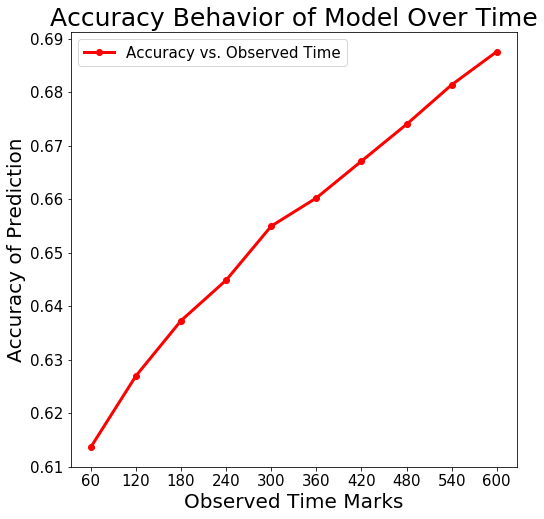

In [86]:
plot_accuracy_vs_time(players_time_df, hero_selection_df, y)

This is good news, because the accuracy of prediction is increasing linearly over time. This means that there are no point in time within the first 10 minutes that offers significant insight into how the game will play out. In plain English, early game does not decide the outcome of the game. This is a good sign because the game is rather balanced with respect to time.

<h1><center>**Predicting the Radiant or Dire win with heroes and Item datas**</center></h1>

<img src=" images/dota b.PNG">


## Model:

We use a simple decision tree to predict whether The Radiant or The Dire will win given hero and item data.

In [4]:
import pandas as pd

%matplotlib inline

In [5]:
players = pd.read_csv('C:/Users/sachi/Downloads/Final/dota-2-matches/players.csv')
matches = pd.read_csv('C:/Users/sachi/Downloads/Final/dota-2-matches/match.csv')
heroes = pd.read_csv('C:/Users/sachi/Downloads/Final/dota-2-matches/hero_names.csv')
items = pd.read_csv('C:/Users/sachi/Downloads/Final/dota-2-matches/item_ids.csv')

#### Let us map the hero_id field to its name.

In [6]:
hero_lookup = dict(zip(heroes['hero_id'], heroes['localized_name']))
hero_lookup[0] = 'Unknown'
players['hero'] = players['hero_id'].apply(lambda _id: hero_lookup[_id])


#### Let us map each item column field to its name.

In [7]:
item_lookup = dict(zip(items['item_id'], items['item_name']))
item_lookup[0] = 'Unknown'

def find_item(_id):
    return item_lookup.get(_id, 'u_' + str(_id))

players['item_0'] = players['item_0'].apply(find_item)
players['item_1'] = players['item_1'].apply(find_item)
players['item_2'] = players['item_2'].apply(find_item)
players['item_3'] = players['item_3'].apply(find_item)
players['item_4'] = players['item_4'].apply(find_item)
players['item_5'] = players['item_5'].apply(find_item)

#### 1. Then, let us binary encode each player's hero using pandas' get_dummies function. 

#### 2.Similarly, let us binary encode each player's item using pandas' get_dummies function. 

#### 3.Because the position of each item does not matter and also to simplify our feature space, let us sum the item columns to count the number of items per kind of item per player

In [8]:
#1
player_heroes = pd.get_dummies(players['hero'])

#2
item0 = pd.get_dummies(players['item_0'].fillna(0))
item1 = pd.get_dummies(players['item_1'].fillna(0))
item2 = pd.get_dummies(players['item_2'].fillna(0))
item3 = pd.get_dummies(players['item_3'].fillna(0))
item4 = pd.get_dummies(players['item_4'].fillna(0))
item5 = pd.get_dummies(players['item_5'].fillna(0))

#3
player_items = item0 \
    .add(item1, fill_value=0) \
    .add(item2, fill_value=0) \
    .add(item3, fill_value=0) \
    .add(item4, fill_value=0) \
    .add(item5, fill_value=0)

#### Let us prepare the column names for every hero name for every team and smilarly, let us also prepare the column names for every item name for every team:

In [9]:
radiant_cols = list(map(lambda s: 'radiant_' + s, player_heroes.columns.values))
dire_cols = list(map(lambda s: 'dire_' + s, player_heroes.columns.values))

radiant_items_cols = list(map(lambda s: 'radiant_' + str(s), player_items.columns.values))
dire_items_cols = list(map(lambda s: 'dire_' + str(s), player_items.columns.values))

Now, let us sum each players hero and item counts so that it will result in one row per match.

The result is a row that encodes whether or not (1 or 0) a type of hero is present for that team and also the sum of the combined item counts for every team - (getting the item per player will be more memory intensive that is why we are combining per team).

I also cached the results of this step because it is quite slow. If you are running this notebook from scratch, you will have to compute it at least once.

In [10]:
X = None


radiant_heroes = []
dire_heroes = []
radiant_items = []
dire_items = []

for _id, _index in players.groupby('match_id').groups.items():
    radiant_heroes.append(player_heroes.iloc[_index][:5].sum().values)
    dire_heroes.append(player_heroes.iloc[_index][5:].sum().values)
    radiant_items.append(player_items.iloc[_index][:5].sum().values)
    dire_items.append(player_items.iloc[_index][5:].sum().values)

radiant_heroes = pd.DataFrame(radiant_heroes, columns=radiant_cols)
dire_heroes = pd.DataFrame(dire_heroes, columns=dire_cols)
radiant_items = pd.DataFrame(radiant_items, columns=radiant_items_cols)
dire_items = pd.DataFrame(dire_items, columns=dire_items_cols)
X = pd.concat([radiant_heroes, radiant_items, dire_heroes, dire_items], axis=1)


X.head()

radiant_Abaddon  radiant_Alchemist  radiant_Ancient Apparition  \
0                0                  0                           0   
1                0                  0                           0   
2                0                  0                           0   
3                0                  0                           0   
4                0                  0                           0   

   radiant_Anti-Mage  radiant_Axe  radiant_Bane  radiant_Batrider  \
0                  0            0             0                 0   
1                  0            0             0                 0   
2                  0            0             0                 0   
3                  0            0             0                 0   
4                  0            0             0                 0   

   radiant_Beastmaster  radiant_Bloodseeker  radiant_Bounty Hunter  \
0                    0                    0                      0   
1                    0                    0                      0   
2                    0                    0                      0   
3                    0                    0                      0   
4                    0                    0                      0   

      ...      dire_vanguard  dire_veil_of_discord  dire_vitality_booster  \
0     ...                0.0                   0.0                    0.0   
1     ...                0.0                   1.0                    0.0   
2     ...                0.0                   1.0                    0.0   
3     ...                0.0                   1.0                    0.0   
4     ...                0.0                   1.0                    0.0   

   dire_vladmir  dire_void_stone  dire_ward_dispenser  dire_ward_observer  \
0           1.0              0.0                  0.0                 0.0   
1           0.0              0.0                  0.0                 0.0   
2           2.0              0.0                  0.0                 0.0   
3           0.0              0.0                  0.0                 1.0   
4           0.0              0.0                  1.0                 0.0   

   dire_ward_sentry  dire_wraith_band  dire_yasha  
0               0.0               0.0         0.0  
1               0.0               0.0         0.0  
2               0.0               0.0         0.0  
3               0.0               0.0         0.0  
4               0.0               0.0         1.0  

[5 rows x 612 columns]

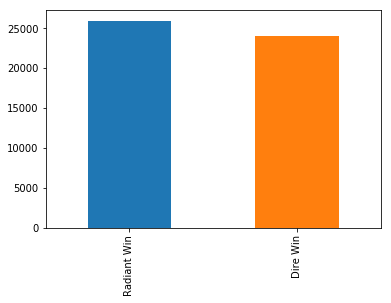

In [11]:
y = matches['radiant_win'].apply(lambda win: 1 if win else 0)
classes = ['Dire Win', 'Radiant Win']

_ = pd.Series(y).apply(lambda i: classes[i]).value_counts().plot('bar')

##  Predictive Modelling
Now that we have our X and y datasets, let us now proceed to the predictive modelling step.

First, we import python libraries which we will use for modelling and visualing the final model:

In [68]:
import io
from scipy import misc
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import cross_val_score
import graphviz
import pydotplus
import matplotlib.pyplot

Also, we define a wrapper that cross-validates, fits and displays our model for easy reuse:

In [69]:
def build_decision_tree(X, y, depth=None):
    dt = DecisionTreeClassifier(random_state=42, max_depth=depth)
    print('CV score:', cross_val_score(estimator=dt, X=X, y=y).mean())
    dt.fit(X, y) 
    return dt

In [70]:
dt = build_decision_tree(X=X, y=y, depth=16)

CV score: 0.8417599342720935


#### As can be seen above, we have obtained a CV score of 84% - way above the 50-55% split. This shows that, the heroes and items are indeed predictive of victory or defeat in DOTA 2.

In [74]:
from sklearn.externals.six import StringIO,BytesIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


export_graphviz(dt, max_depth=4,
                    label=None,
                    impurity=False,
                    filled=True,
                    rounded=True,
                    proportion=False,
                    rotate=True,
                    out_file='tree_limited.dot', 
                    class_names=classes, 
                    feature_names=X.columns)
 
!dot -Tpng tree_limited.dot -o tree_limited.png -Gdpi=600
Image(filename = 'tree_limited.png')

Other important factors can also be seen below by extracting the feature importances of the tree:

In [27]:
def get_tree_stats(dt):
    feature_importances = dict(zip(X.columns, dt.feature_importances_))
    feature_importances = pd.Series(feature_importances).sort_values(ascending=False)
    return feature_importances.iloc[feature_importances.nonzero()]

get_tree_stats(dt).head(20)

dire_travel_boots          0.203223
dire_gem                   0.104874
radiant_travel_boots       0.103673
radiant_gem                0.077311
radiant_ogre_axe           0.062642
dire_aegis                 0.059328
dire_assault               0.047569
radiant_Unknown            0.040661
radiant_aegis              0.033091
dire_butterfly             0.028862
dire_ogre_axe              0.025828
radiant_assault            0.020026
dire_Unknown               0.018916
dire_guardian_greaves      0.018145
dire_ultimate_scepter      0.013536
radiant_butterfly          0.012071
dire_abyssal_blade         0.010682
radiant_monkey_king_bar    0.010277
radiant_abyssal_blade      0.007701
dire_moon_shard            0.007699
dtype: float64

<h1><center>**Thank you!!!**</center></h1>
<img src = "images/psy.jpg">

# References

https://www.youtube.com/watch?v=XQgXKtPSzUI

https://www.kaggle.com/devinanzelmo/dota-2-matches/version/3

https://www.youtube.com/watch?v=J_Cy_QjG6NE

https://dota2api.readthedocs.io/en/latest/

http://www.dota2.com/heroes/

https://www.google.com/search?q=data+science+memes&rlz=1C1CHBF_enUS814US814&tbm=isch&tbo=u&source=univ&sa=X&ved=2ahUKEwjD5_W0xJ3fAhWNAxAIHXh2AtQQsAR6BAgBEAE&biw=767&bih=744&dpr=1.25